# Introduction: A Safety Oriented Look at Pittsburgh Neighborhoods
This project is a data driven analysis with the goal of determining what the best neighborhood in Pittsburgh is. There are many things that someone could consider when choosing the best neighborhood. What fun things are in the neighborhood, how nice the homes are in the neighborhood, and how safe the neighborhood is could all determine what the best neighborhood is. We considered using the overall economy of the neighborhoods or the fun activities in the neighborhoods, but eventually we decided to choose overall safety as our metric

## The Metric:
We decided to judge the safety of the neighborhoods to determine which one is the best. We did this by measuring several important aspects of safety. The first thing we measured was the amount of crime there was in each neighborhood. Using a dataset that included the total crime and how bad every crime was, we aimed to find which neighborhood had the lowest crime rate. The second thing we measured was the fire incidents in each neighborhood. Using a dataset that included the total incidents per neighborhood as well as the kind of incident, the goal was to find the neighborhood that had the best fire safety. Finally, the last thing we measured was the speed humps in each neighborhood. We used a dataset that included the total number of speed humps in each neighborhood with the goal of determining which had the best road safety. All three of these submetrics are critical to the overall safety of a neighborhood. 

### An Individual Glimpse

Before we combine our metrics, we're going to take some time to look at everything that each member has created so far and see what we can learn from that, then we'll see what information we can learn when combining everything together.

### The First Submetric
My metric is the crime per neighborhood. In order to determine whether a neighborhood is truly the best, crime seemed like the best way to approach this. The smaller amount of crime normally correlates to the overall safety of the neighborhood. In my dataset, each neighborhood's crimes were listed and for each crime was an integer value that rated how severe the crime was where 1 was the most severe. By finding the count, total severity in crime, and the average severity by count and per neighborhood, we should be able to find the best neighborhood.

### Count Of Crimes Per Neighborhood

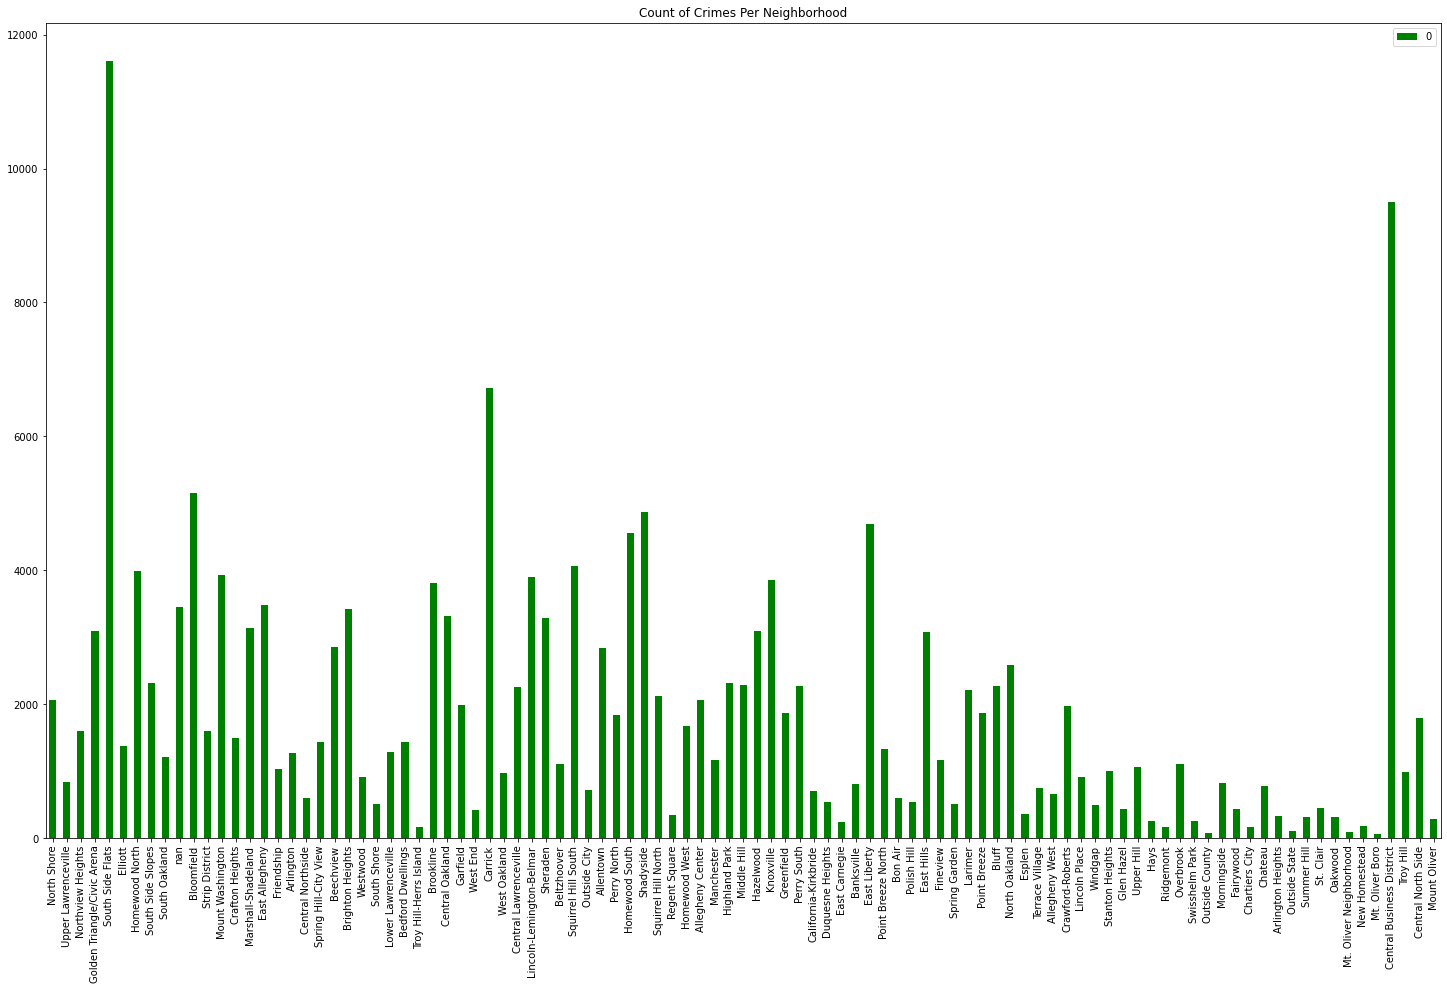

In [1]:
import pandas as pd
import geopandas
%matplotlib inline

chip = pd.read_csv("data/CrimeRate.csv")

dict = {}
dict_count = {}
for index, row in chip.iterrows():
    if not row['INCIDENTNEIGHBORHOOD'] in dict and row["HIERARCHY"] < 99:
        dict[row['INCIDENTNEIGHBORHOOD']] = row['HIERARCHY']
        dict_count[row['INCIDENTNEIGHBORHOOD']] = 1
        
    elif row["HIERARCHY"] < 99:
        dict[row['INCIDENTNEIGHBORHOOD']] = dict.get(row['INCIDENTNEIGHBORHOOD']) + row['HIERARCHY']
        dict_count[row['INCIDENTNEIGHBORHOOD']] = dict_count.get(row['INCIDENTNEIGHBORHOOD']) + 1

count_df = pd.DataFrame.from_dict(dict_count, orient = 'index')

count_df.plot(kind = "bar", figsize=(25,15), color= "green", title = "Count of Crimes Per Neighborhood")

### Sorted Count

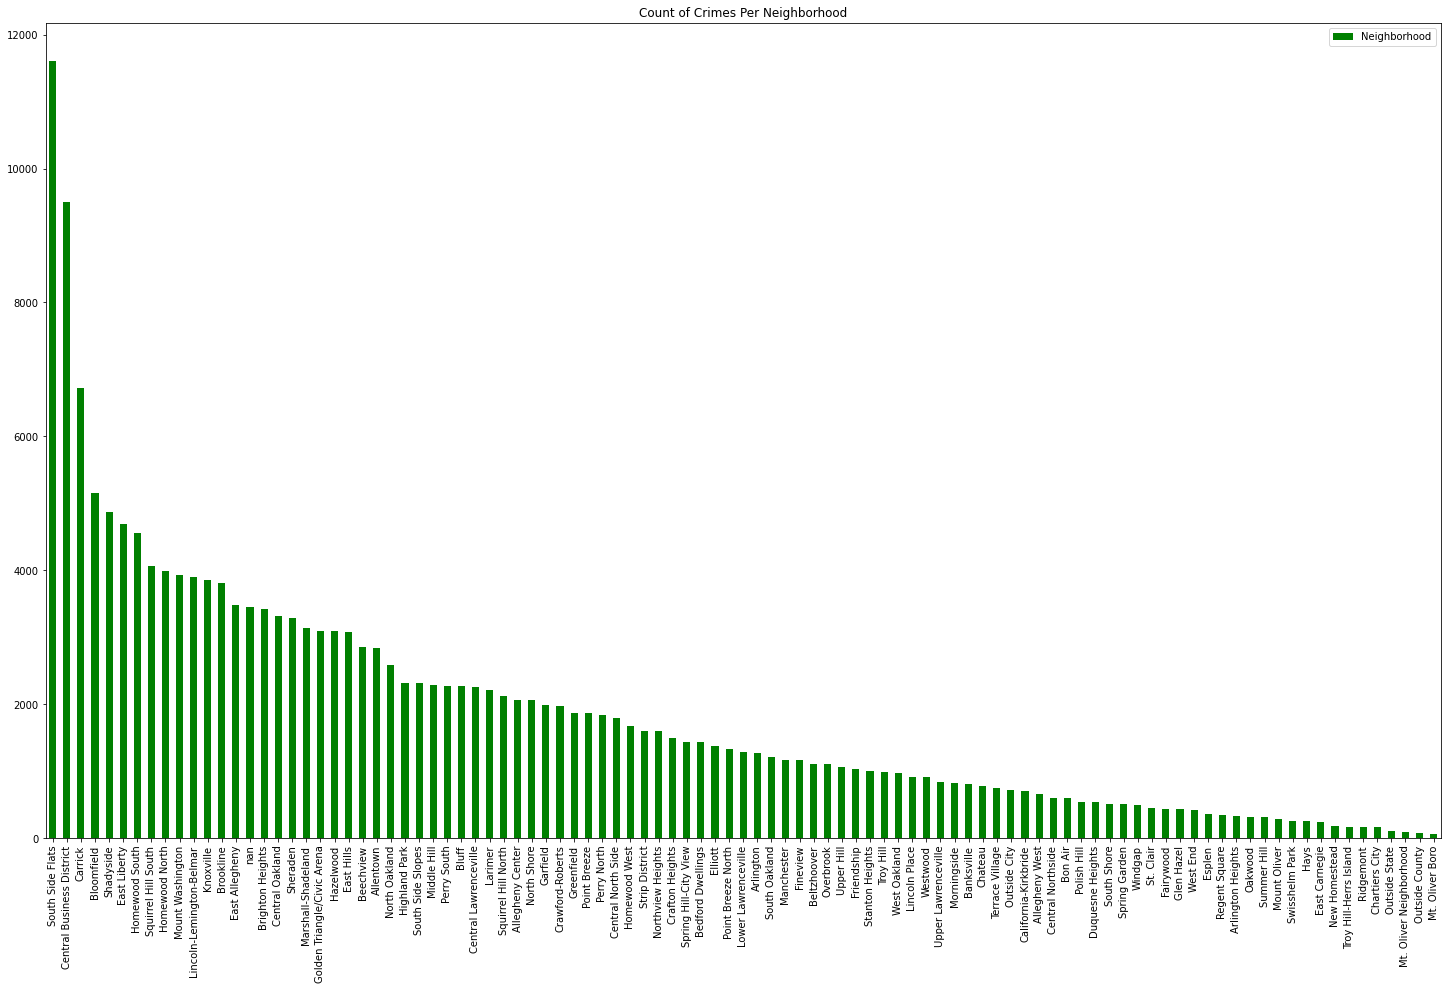

In [2]:
count_df.columns = ['Neighborhood']
sorted_count = count_df.sort_values('Neighborhood', axis = 0, ascending = False, kind = "quicksort")

sorted_count.plot(kind = "bar", figsize=(25,15), color= "green", title = "Count of Crimes Per Neighborhood")


### Severity Total In Crime

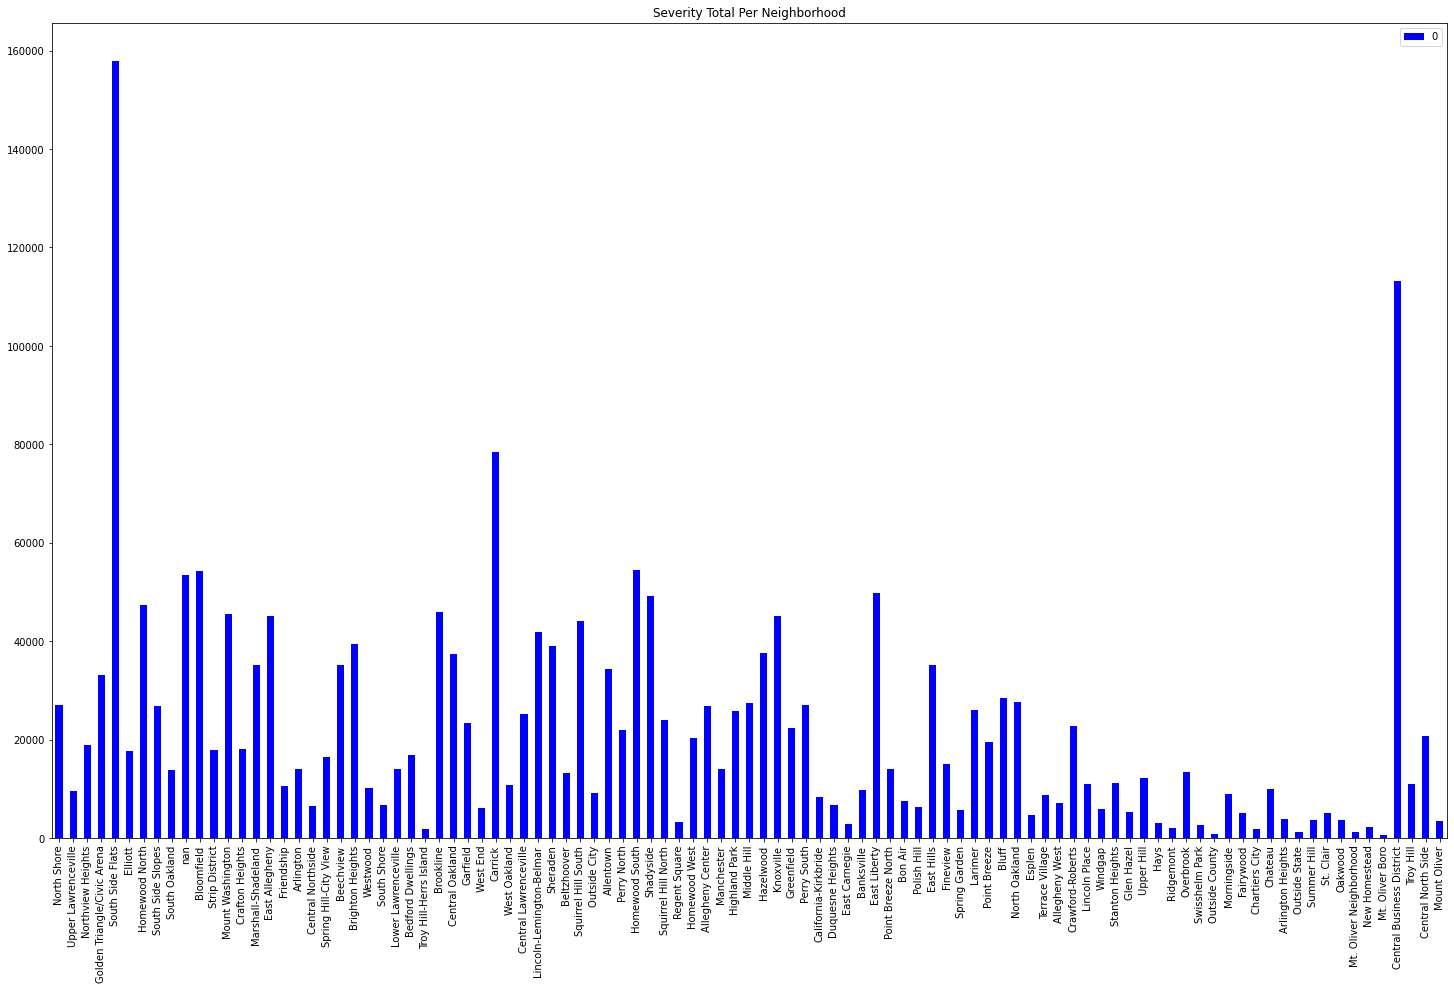

In [3]:
total_severity_df = pd.DataFrame.from_dict(dict, orient = 'index')

total_severity_df.plot(kind = "bar", figsize=(25,15), color= "blue", title = "Severity Total Per Neighborhood")


### Sorted Severity In Crime

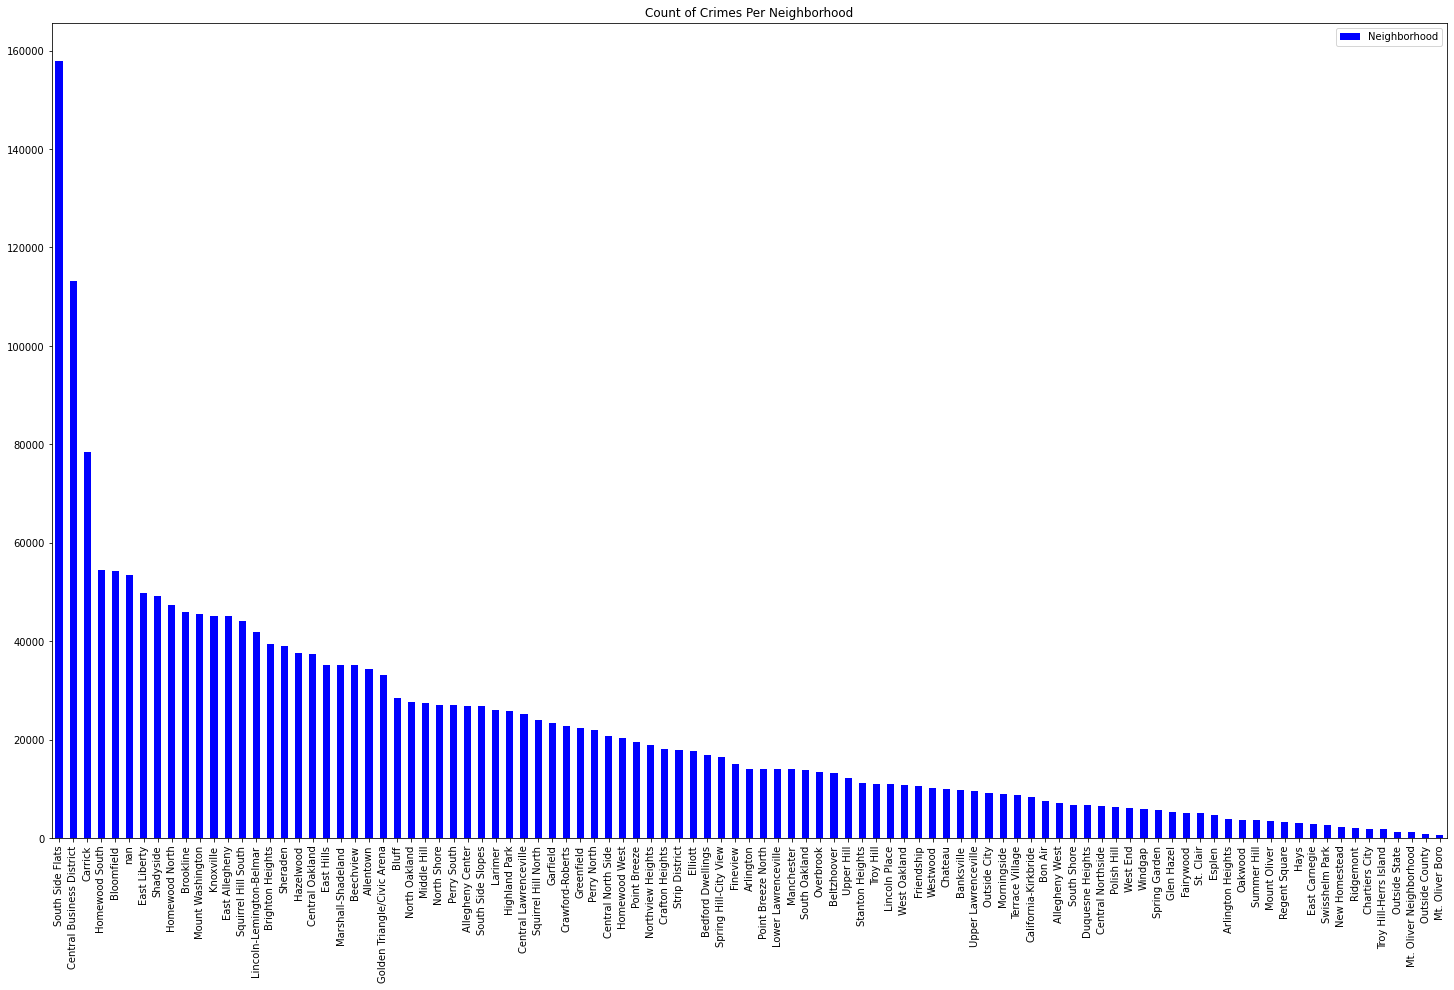

In [4]:
total_severity_df.columns = ['Neighborhood']
sorted_severity = total_severity_df.sort_values('Neighborhood', axis = 0, ascending = False, kind = "quicksort")

sorted_severity.plot(kind = "bar", figsize=(25,15), color= "blue", title = "Count of Crimes Per Neighborhood")

### Average Crime Per Neighborhood

Next, I found the averages of the crimes' hierarchy against the total count of crimes in that neighborhood.

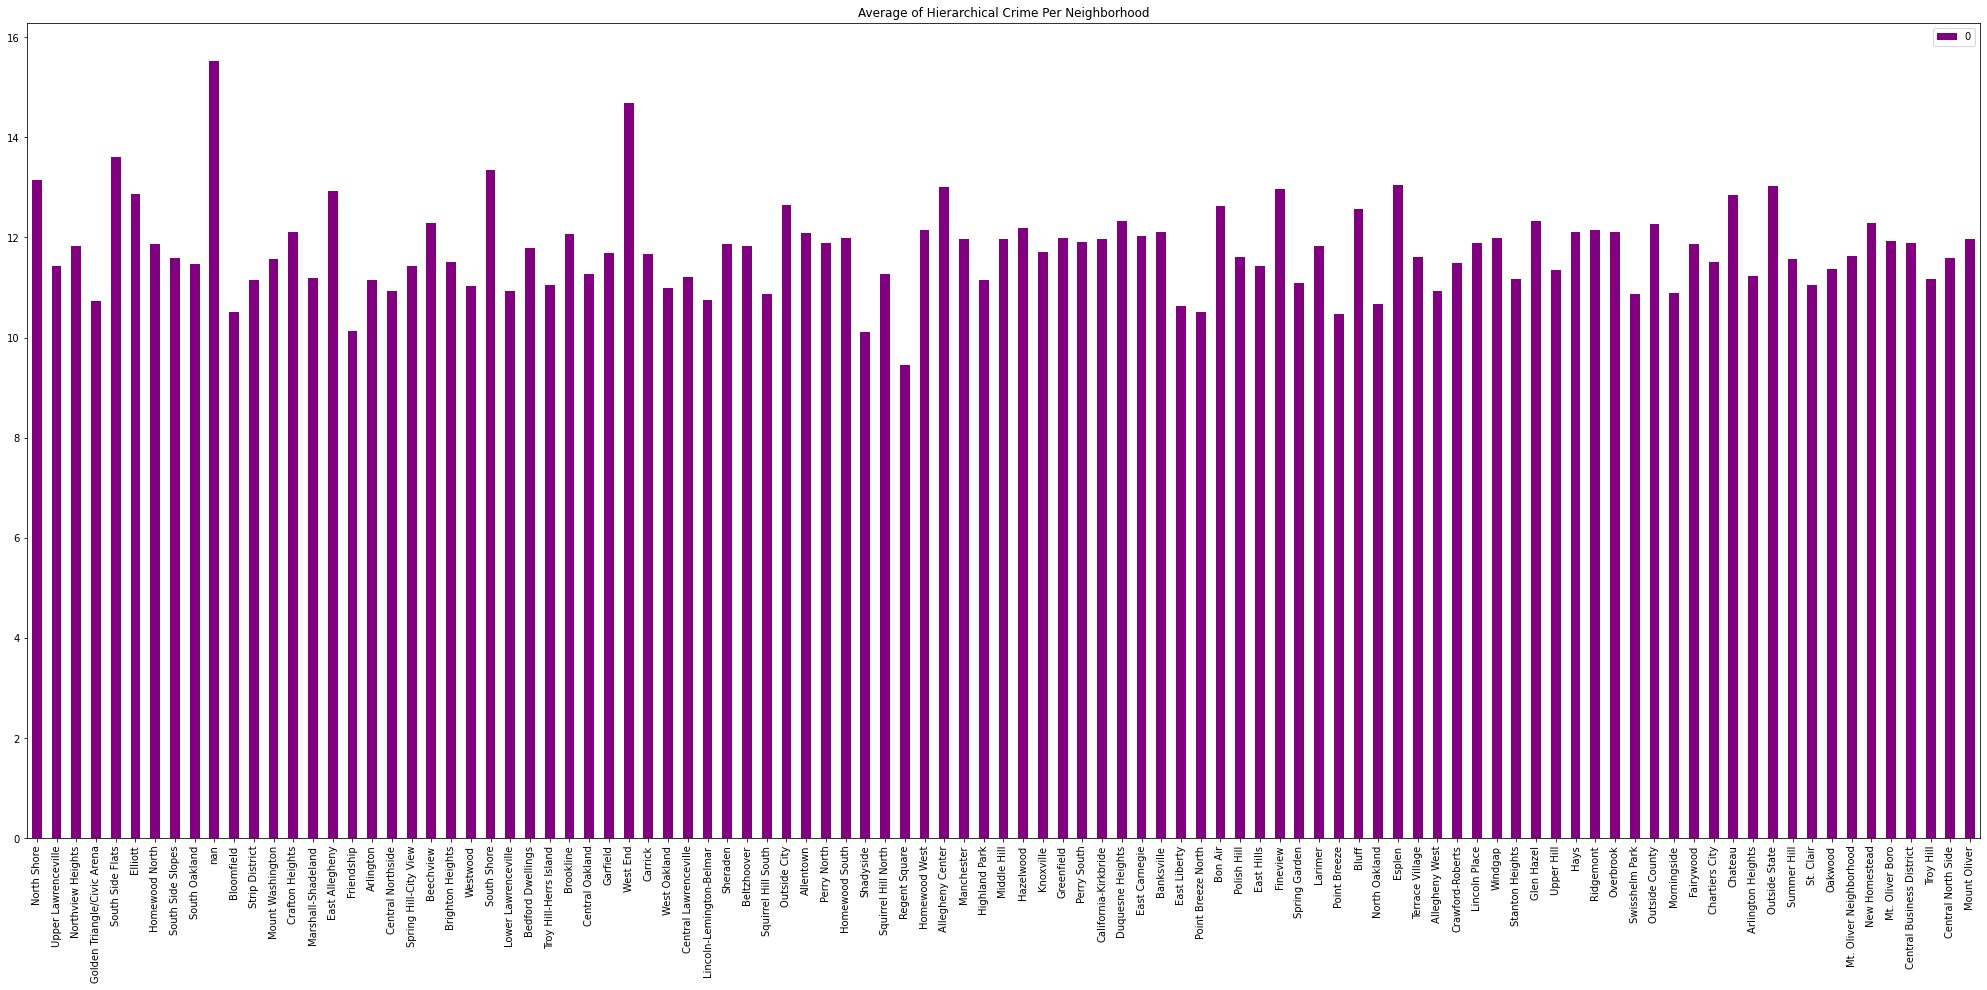

In [5]:
mean = {}
for (k,v), (k2,v2) in zip(dict.items(), dict_count.items()):
     mean[k] = v/v2
        
mean_dataframe = pd.DataFrame.from_dict(mean, orient = 'index')

mean_dataframe.plot(kind = "bar", figsize=(35,15), title = "Average of Hierarchical Crime Per Neighborhood", color = "purple")

### Sorted Averages

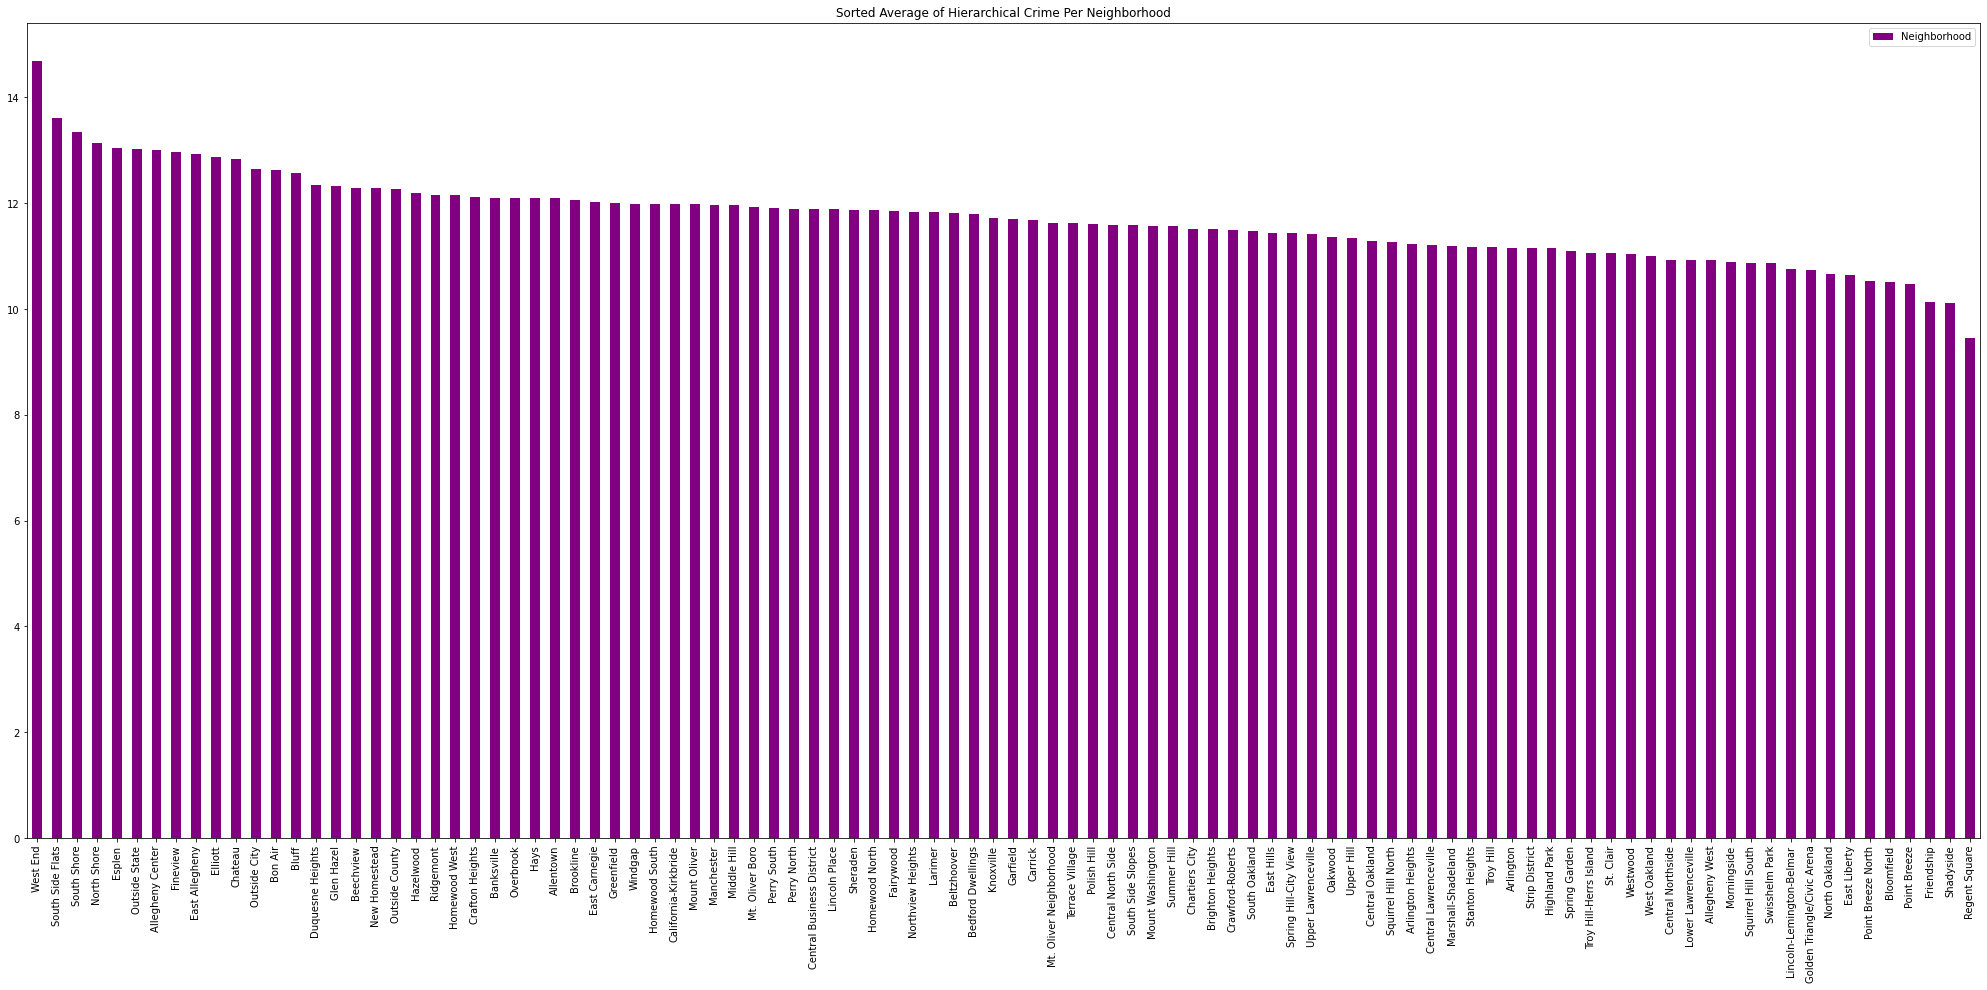

In [6]:
mean_dataframe.columns = ['Neighborhood']
sorted_mean = mean_dataframe.sort_values('Neighborhood', axis = 0, ascending = False, kind = "quicksort")
sorted_mean = sorted_mean.iloc[1: , :]
sorted_mean.plot(kind = "bar", figsize=(35,15), title = "Sorted Average of Hierarchical Crime Per Neighborhood", color = "purple")

### A Closer Look

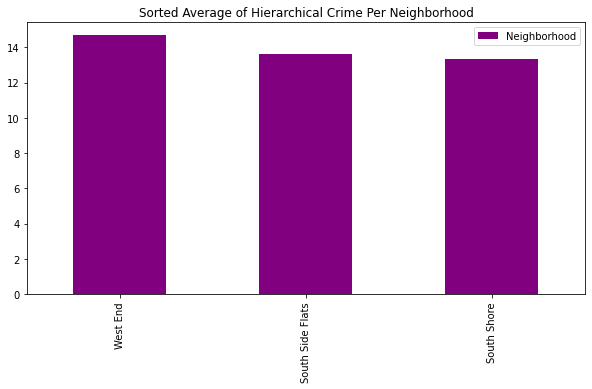

In [7]:
sorted_mean = sorted_mean.head(3)
sorted_mean.plot(kind = "bar", figsize=(10,5), title = "Sorted Average of Hierarchical Crime Per Neighborhood", color = "purple")

### The Best Neighborhood
These are the three neighborhoods with the lowest average severity crime. It's important to note that because of how the original dataset was created, crimes listed as lower severity are actually worse, so in this case, a higher number is better. From this graph we can see that the neighborhood West End has the lowest average severity of crime, making it the safest and best neighborhood in Pittsburgh.

#### Conclusion
After sorting my plot of average hierachical crime, it was a lot clearer to differentiate between the worst and best neighborhoods. As a result, I conclude that this dataset shows that West End is the best neighborhood because it has the smallest average of hierarchical crime and a low amount of overall crimes commited. This means that families and residents are in far less danger than those in other neighborhoods, which makes it safer than other neighborhoods in the city. While my favorite neighborhood is Oakland, South Oakland shows as being in the middle of the average of crime. I don't normally hear of crimes being committed around Oakland, but I suppose there are plenty for the average to be what it is. 

### Fires in Pittsburgh

Now, we'll take a look at fire incidents across the different neighborhoods.

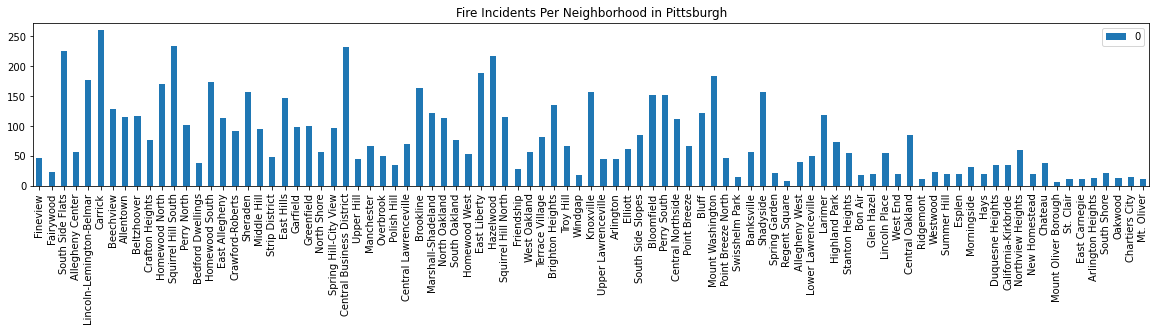

In [8]:
import pandas as pd

#Sets up dataframe from the file and creates an empty dictionary
fires = pd.read_csv("data/fires.csv")
fireCount = {}


#Cycles through the data set and counts the number of fire incidents in each neighborhood. 
#This information is then added to the dictionary
for index, row in fires.iterrows():
    neighborhood = row['neighborhood']
    severity = row['incident_type']
    if neighborhood in fireCount:
        fireCount[neighborhood] += 1
    elif neighborhood not in fireCount and neighborhood != None:
        fireCount[neighborhood] = 1

#turns the dictionary into a dataframe and creates a basic bar graph
fireCountGraph = pd.DataFrame.from_dict(fireCount, orient='index', dtype = None, columns=None)
fireCountGraph = fireCountGraph.iloc[1: , :]
fireCountGraph.plot.bar(figsize=(20,3), title = "Fire Incidents Per Neighborhood in Pittsburgh")

### Total Severity Rating

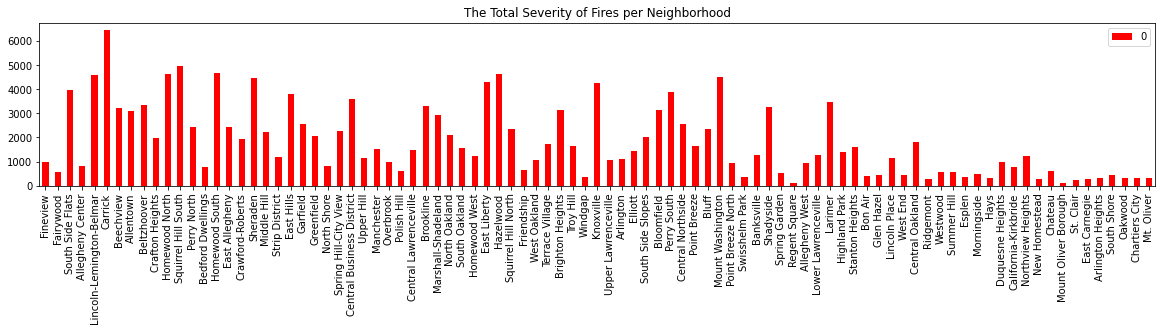

In [9]:
#Creates severity dictionary
fireSeverity = {}
for index, row in fires.iterrows():
    neighborhood = row['neighborhood']
    severity = row['incident_type']
    if neighborhood in fireSeverity:
        if severity == 111:
            fireSeverity[neighborhood] += 50
        elif severity == 131:
            fireSeverity[neighborhood] += 35
        elif severity == 113:
            fireSeverity[neighborhood] += 18
        elif severity == 114:
            fireSeverity[neighborhood] += 12
        elif severity == 151 or severity == 150:
            fireSeverity[neighborhood] += 8
        elif severity == 141 or severity == 142 or severity == 143:
            fireSeverity[neighborhood] += 27
        else:
            fireSeverity[neighborhood] += 5
    elif neighborhood not in fireSeverity and neighborhood != None:
        if severity == 111:
            fireSeverity[neighborhood] = 50
        elif severity == 131:
            fireSeverity[neighborhood] = 35
        elif severity == 113:
            fireSeverity[neighborhood] = 18
        elif severity == 114:
            fireSeverity[neighborhood] = 12
        elif severity == 151 or severity == 150:
            fireSeverity[neighborhood] = 8
        elif severity == 141 or severity == 142 or severity == 143:
            fireSeverity[neighborhood] = 27
        else:
            fireSeverity[neighborhood] = 5
#changes dictionary to dataframe and graphs
fireSeverityGraph = pd.DataFrame.from_dict(fireSeverity, orient='index', dtype = None, columns=None)
fireSeverityGraph = fireSeverityGraph.iloc[1: , :]
fireSeverityGraph.plot.bar(figsize=(20,3), title = "The Total Severity of Fires per Neighborhood", color = "red")

### Average Severity of Fire

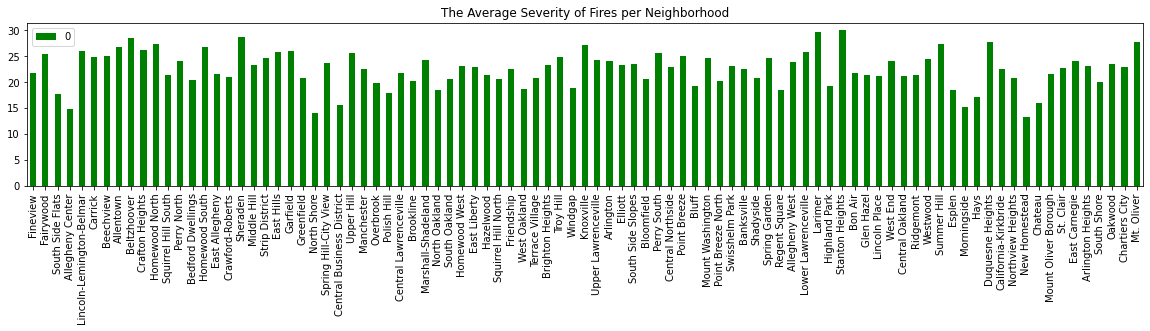

In [10]:
#creates the average severity dictionary
avgSeverity = {}
for neighborhood in fireCount:
    if neighborhood not in avgSeverity:
        avgSeverity[neighborhood] = fireSeverity[neighborhood] / fireCount[neighborhood]
    
#Turns the dictionary into a dataframe and graphs it.
avgSeverityGraph = pd.DataFrame.from_dict(avgSeverity, orient='index', dtype = None, columns=None)
avgSeverityGraph = avgSeverityGraph.iloc[1: , :]
avgSeverityGraph.plot.bar(figsize=(20,3), title = "The Average Severity of Fires per Neighborhood", color = "green")

### Sorted Graphs

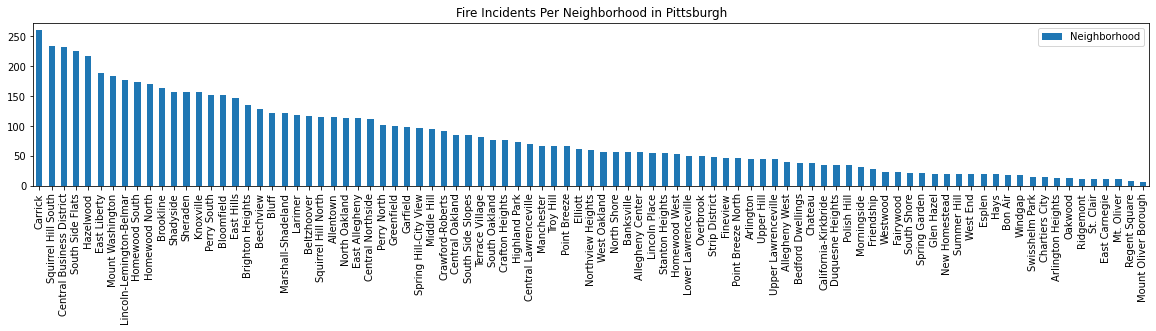

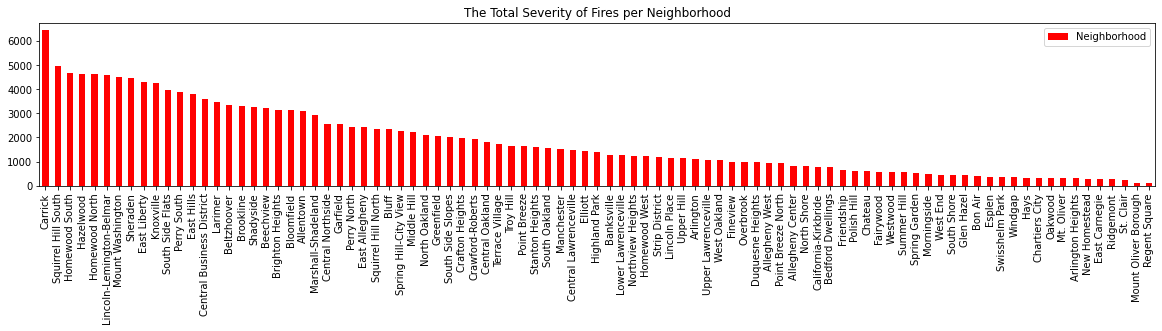

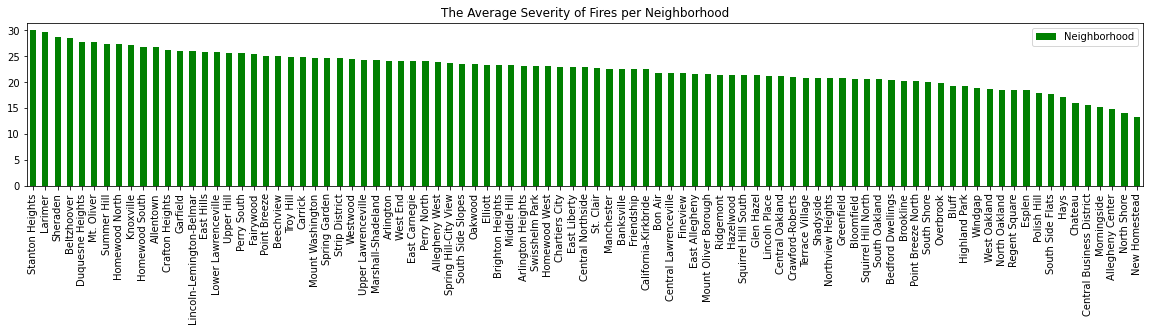

In [11]:
#here we sort the values of the each dataframe and regraph
fireCountGraph.columns = ['Neighborhood']
countSorted = fireCountGraph.sort_values('Neighborhood', axis = 0, ascending=False, kind = "quicksort")
countSorted.plot.bar(figsize=(20,3), title = "Fire Incidents Per Neighborhood in Pittsburgh")

fireSeverityGraph.columns = ['Neighborhood']
severitySorted = fireSeverityGraph.sort_values('Neighborhood', axis = 0, ascending=False, kind = "quicksort")
severitySorted.plot.bar(figsize=(20,3), title = "The Total Severity of Fires per Neighborhood", color = "red")

avgSeverityGraph.columns = ['Neighborhood']
avgSorted = avgSeverityGraph.sort_values('Neighborhood', axis = 0, ascending=False, kind = "quicksort")
avgSorted.plot.bar(figsize=(20,3), title = "The Average Severity of Fires per Neighborhood", color = "green")


### Trimmed Graphs

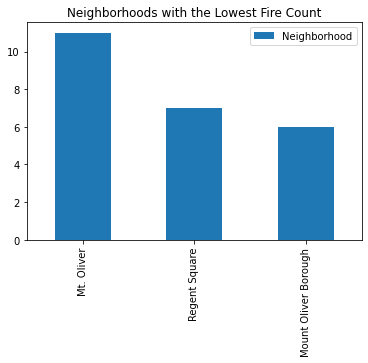

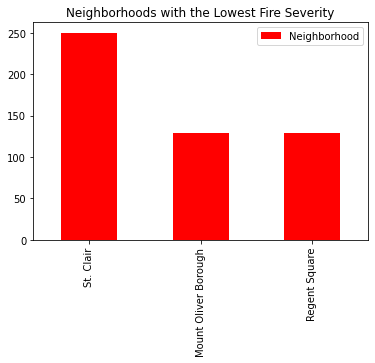

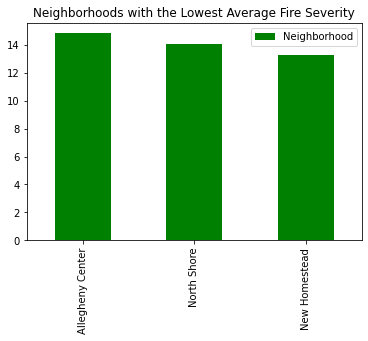

In [12]:
countTopFive = countSorted.tail(3)
countTopFive.plot.bar(title="Neighborhoods with the Lowest Fire Count")

severityTopFive = severitySorted.tail(3)
severityTopFive.plot.bar(title = "Neighborhoods with the Lowest Fire Severity", color = "red")

avgTopFive = avgSorted.tail(3)
avgTopFive.plot.bar(title = "Neighborhoods with the Lowest Average Fire Severity", color = "green")


#### Conclusion:
With these final graphs, we can see that there could have been three different winners.  IF we only counted the fire incidents, Mount Oliver Borough would win. If we took the total severity of the incidents, Regent Square would win. And finally, if we only looked at the average severity, New Homestead would win. So what does this mean? Well it means that there must be a decision about which graph is the most important. The average severity per fire is the most important because it depicts which neighborhoods are more dangerous the best. By finding the average severity of the fires, it takes into account not just the number of the fires, but also how bad they are. This is why from my data, I declare theat New Homestead is the best neighborhood in Pittsburgh.

While my metric declared New Homestead as the best neighborhood, my experience states otherwise. My personal favorite neighborhood is Moneroeville due to it having lots to do and is generally a nice area. I believe this discrepency between my favorite neighborhood and the one the data declared the best is due to what determines my favorite neighborhood. Other than Oakland, I have never lived in Pittsburgh, so I never took the fire safety into consideration as I would only be there for a limited time.

### Speedhumps in Pittsburgh

Finally, we're going to take a look at the number of speedhumps throughout Pittsburgh. 

In [13]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager


def metaGraphGroup(label):
    title = label + " Per Neighborhood in Pittsburgh, PA"
    plt.ylabel(label, fontweight="bold", fontname="PT Serif", fontsize=13)
    plt.xlabel("Neighborhood", fontweight="bold", fontname="PT Serif", fontsize=13)
    plt.title(title, fontweight="bold", fontname="PT Serif", fontsize=15)

def metaGraph():
    plt.yticks([0,2,4,6,8,10,12,14,16,18,])
    plt.ylabel("Humps", fontweight="bold", fontname="PT Serif", fontsize=13)
    plt.xlabel("Neighborhood", fontweight="bold", fontname="PT Serif", fontsize=13)
    plt.title("Humps per Hood in Pittsburgh, PA", fontweight="bold", fontname="PT Serif", fontsize=15)



humps = pd.read_csv("data/speedhumps.csv")

humps.head()

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


In [14]:
hph = {}  # My custom metric of Humps Per Hood
hoods = []
nums = []

# To do this better, insert in order the neighborhoods, then increment the corresponding index in the nums list
# FUN FACT: YOU CAN'T ACTUALLY DO THAT (AT LEAST NOT EASILY)
for index, row in humps.iterrows():
    hood = row["neighborhood"]
    if hood in hph:
        hph[hood] += 1
    else:
        hph[hood] = 1
        
for i in hph:
    hoods.append(i)
    nums.append(hph[i])


hph = {"Neighborhood":hoods, "Humps":nums}
print(hph)

{'Neighborhood': ['Squirrel Hill South', 'North Oakland', 'Brookline', 'Bloomfield', 'Polish Hill', 'Homewood South', 'Mount Washington', 'South Side Flats', 'Central Oakland', 'Squirrel Hill North', 'Upper Hill', 'Highland Park', 'Carrick', 'Perry North', 'South Side Slopes', 'Garfield', 'Stanton Heights', 'Overbrook'], 'Humps': [18, 6, 4, 3, 6, 4, 3, 3, 1, 3, 4, 2, 9, 4, 4, 3, 1, 1]}


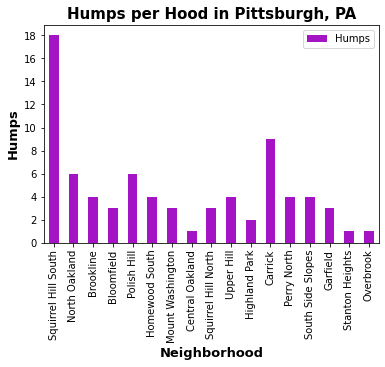

In [25]:
graphHumps = pd.DataFrame.from_dict(hph)
matplotlib.font_manager.findSystemFonts(fontpaths="/data/fonts/", fontext='ttf')
graphHumps.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
metaGraph()

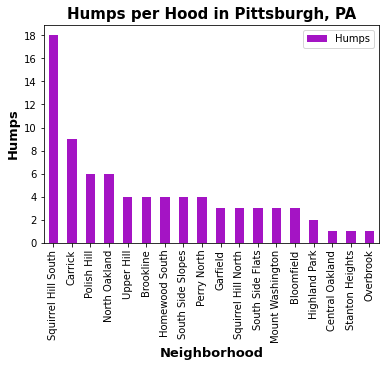

In [16]:
graphHumpsSorted = graphHumps.sort_values("Humps", ascending=False)

graphHumpsSorted.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
metaGraph()

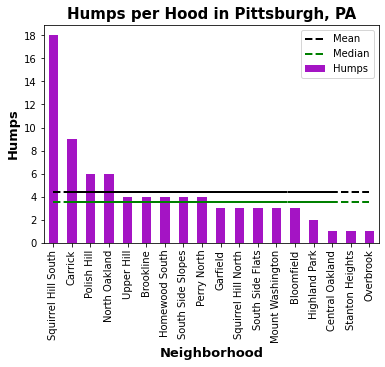

In [17]:
mean = graphHumps["Humps"].mean()
median = graphHumps["Humps"].median()
graphHumps["Mean"] = mean
graphHumps["Median"] = median
graphHumpsSorted = graphHumps.sort_values("Humps", ascending=False)

graphHumpsSorted.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
graphHumpsSorted["Mean"].plot.line(style="--", lw=2, color="black")
graphHumpsSorted["Median"].plot.line(style="--", rot=90, lw=2, color="green")
plt.legend(["Mean", "Median", "Humps"])
metaGraph()

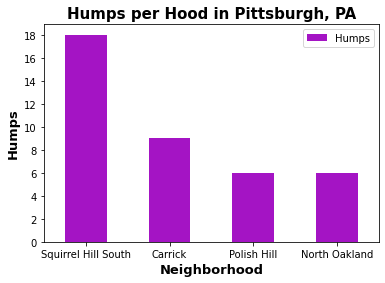

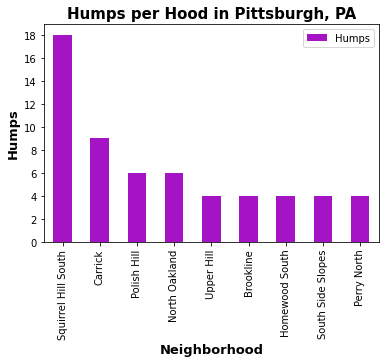

In [18]:
ghwQueryMean = graphHumpsSorted["Humps"] >= mean
ghwQueryMedian = graphHumpsSorted["Humps"] >= median

graphHumpsSorted[ghwQueryMean].plot.bar(color="#A414C4",x="Neighborhood", y="Humps", rot=0)
metaGraph()
graphHumpsSorted[ghwQueryMedian].plot.bar(color="#A414C4",x="Neighborhood", y="Humps")
metaGraph()

#### Declaring Our Winners

The last thing that remains for us to do is crown some winners. Sadly, there are a bunch of ties in our data, so the best we can do is give a clear first and second (Going to Squirrel Hill South and Carrick respectively), then give out a bunch of tied 3rd and 4th place medals. To do this we collect the neighborhoods that are above the mean line and those that are above the median. This gets us some slightly different results, and it's up to you on which average to trust, but now you have a good idea of where to start on picking your safest neighborhood.

## Data to Dictionary

Now that we have all our data we need to turn them into dictionaries so that we can get some graphs from their dataframes later. While doing this, we realize that not all databases are created equally and thus limit our later two datasets to only include neighborhoods that exist within our smallest database, Humps Per Hood.

In [19]:
#creates dictionaries for each metric

#humps dictionary
hph = {}
hoods = []
nums = []

for index, row in humps.iterrows():
    hood = row["neighborhood"]
    if hood in hph:
        hph[hood] += 1
    elif hood not in hph and hood != "South Side Flats":
        hph[hood] = 1
        
for i in hph:
    hoods.append(i)
    nums.append(hph[i])
    
hph = {"Neighborhood":hoods, "Humps":nums}

#Creates severity dictionary
fireSeverity = {}
for index, row in fires.iterrows():
    neighborhood = row['neighborhood']
    severity = row['incident_type']
    if neighborhood in fireSeverity:
        if severity == 111:
            fireSeverity[neighborhood] += 50
        elif severity == 131:
            fireSeverity[neighborhood] += 35
        elif severity == 113:
            fireSeverity[neighborhood] += 18
        elif severity == 114:
            fireSeverity[neighborhood] += 12
        elif severity == 151 or severity == 150:
            fireSeverity[neighborhood] += 8
        elif severity == 141 or severity == 142 or severity == 143:
            fireSeverity[neighborhood] += 27
        else:
            fireSeverity[neighborhood] += 5
    elif neighborhood not in fireSeverity and neighborhood != None and neighborhood in hoods:
        if severity == 111:
            fireSeverity[neighborhood] = 50
        elif severity == 131:
            fireSeverity[neighborhood] = 35
        elif severity == 113:
            fireSeverity[neighborhood] = 18
        elif severity == 114:
            fireSeverity[neighborhood] = 12
        elif severity == 151 or severity == 150:
            fireSeverity[neighborhood] = 8
        elif severity == 141 or severity == 142 or severity == 143:
            fireSeverity[neighborhood] = 27
        else:
            fireSeverity[neighborhood] = 5

avgSeverity = {}
for neighborhood in fireSeverity:
    if neighborhood not in avgSeverity:
        avgSeverity[neighborhood] = fireSeverity[neighborhood] / fireCount[neighborhood]

#crime dictionary
crime_dict = {}
dict_count = {}
for index, row in chip.iterrows():
    cur_hood = row['INCIDENTNEIGHBORHOOD']
    if cur_hood in crime_dict:
        crime_dict[cur_hood] = crime_dict.get(cur_hood) + row['HIERARCHY']
        dict_count[cur_hood] = dict_count.get(cur_hood) + 1
    elif cur_hood not in crime_dict and cur_hood in hoods:
        crime_dict[cur_hood] = row['HIERARCHY']
        dict_count[cur_hood] = 1
        
mean = {}
for (k,v), (k2,v2) in zip(crime_dict.items(), dict_count.items()):
     mean[k] = v/v2



## Dictionary to Dataframe

Now that we have dictionaries we need dataframes for graphing. This is easy enough, or it would be if we had generated some nicer dictionaries, sadly we live in a cruel cruel world and have to append some extra code so that all of our dataframes have the same levels of information.

In [20]:
#turns our dictionaries into dataframes for easier manipulation

#fires dataframe
graph = pd.DataFrame.from_dict(avgSeverity, orient='index', dtype = None, columns=None)
graph = graph.iloc[1: , :]
#Fixing the indexing and column names
graph.reset_index(inplace=True)
graph = graph.rename(columns = {'index':'Neighborhood', 0:'Fire Incidents'})

#crime dataframes
mean_dataframe = pd.DataFrame.from_dict(mean, orient = 'index')
#Fixing the indexing and column names
mean_dataframe.reset_index(inplace=True)
mean_dataframe = mean_dataframe.rename(columns = {'index':'Neighborhood', 0:'Crime Incidents'})

#humps dataframe
graphHumps = pd.DataFrame.from_dict(hph)

## Dataframe to Graphs

Now we have our nice dataframes and we can just throw them through some functions to get pretty graphs. On their own this tells us really little, especially since higher numbers mean better in some locations, and worse in others. Let's do something about this.  

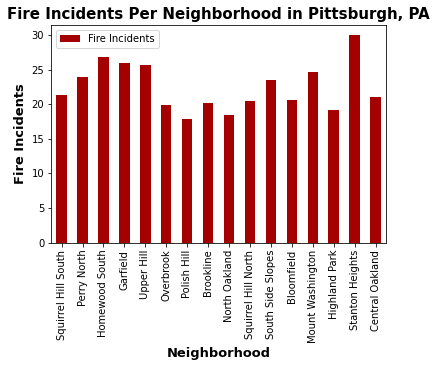

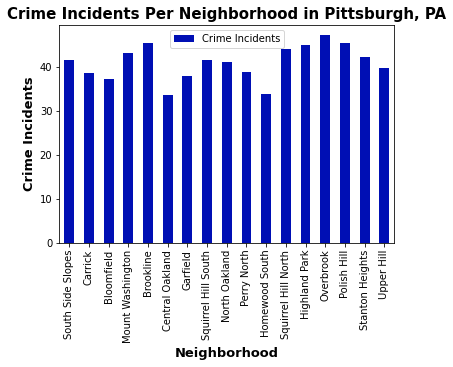

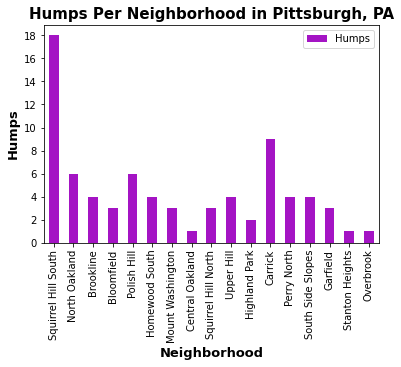

In [21]:
#Now let's get some pretty graphs out
graph.plot.bar(color="#A50000",  x="Neighborhood", y="Fire Incidents")
metaGraphGroup("Fire Incidents")

mean_dataframe.plot.bar(color="#000FB4", x="Neighborhood", y="Crime Incidents")
metaGraphGroup("Crime Incidents")

graphHumps.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
plt.yticks([0,2,4,6,8,10,12,14,16,18,])
metaGraphGroup("Humps")

## Sorted Graphs

Now let's sort our graphs in accordance with their metric. So for our first two graphs, lower means better, so we're going to assort them ascending, but for our last graph, higher means better, and so we sort it descending. Still, we don't see a clear winner, so we have to do some cool math.

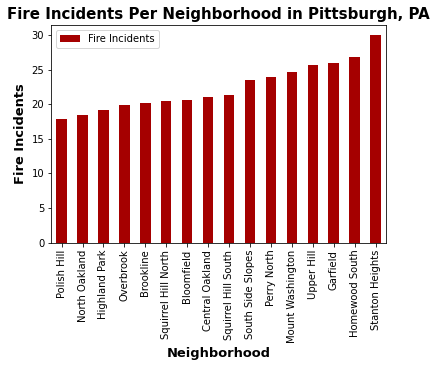

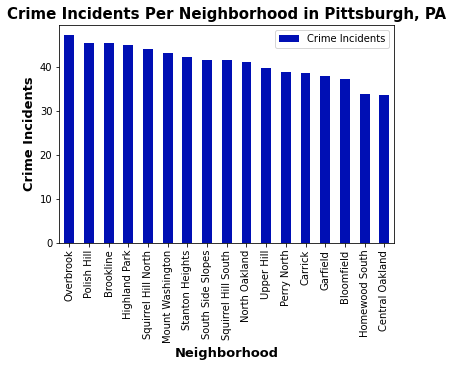

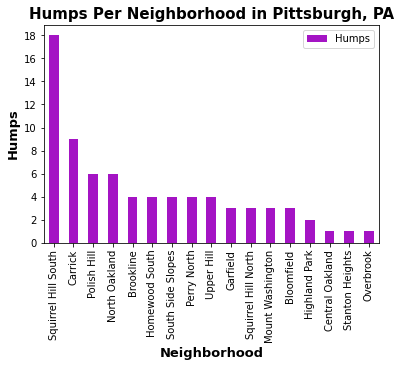

In [22]:
#We do a little sorting
graphSorted = graph.sort_values("Fire Incidents", ascending=True)
count_df_sorted = mean_dataframe.sort_values("Crime Incidents", ascending=False)
graphHumpsSorted = graphHumps.sort_values("Humps", ascending=False)

#More pretty graphs
graphSorted.plot.bar(color="#A50000",  x="Neighborhood", y="Fire Incidents")
metaGraphGroup("Fire Incidents")

count_df_sorted.plot.bar(color="#000FB4", x="Neighborhood", y="Crime Incidents")
metaGraphGroup("Crime Incidents")

graphHumpsSorted.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
plt.yticks([0,2,4,6,8,10,12,14,16,18,])
metaGraphGroup("Humps")

## Putting it All Together

Finally, the time has come for us to combine all of our metrics. We've decided to do this in a way similar to the Olympics. Meaning that we're going to give out points for winning which will be less than the number of points for losing. So first place will get 1 point, second will get 2 etc. Then, we can graph the point totals for the neighborhoods and decide, via who has the least points, which neighborhood is the safest. 

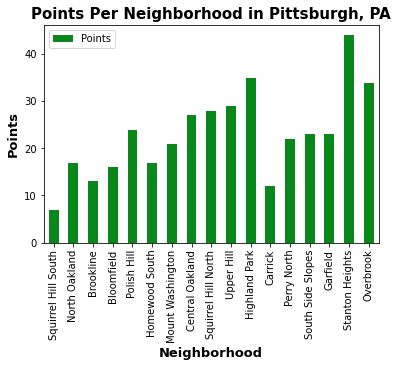

In [23]:
points = [0] * len(hoods)

for i in range(0, len(graphSorted["Neighborhood"])):
    k = hoods.index(graphSorted["Neighborhood"].loc[i])
    points[k] += i
    
for i in range(0, len(count_df_sorted["Neighborhood"])):
    k = hoods.index(count_df_sorted["Neighborhood"].loc[i])
    points[k] += i
    
for i in range(0, len(graphHumpsSorted["Neighborhood"])):
    k = hoods.index(graphHumpsSorted["Neighborhood"].loc[i])
    points[k] += i

pointsDict = {"Neighborhood":hoods, "Points":points}
pointsDF = pd.DataFrame.from_dict(pointsDict)

pointsDF.plot.bar(color="#08871A",  x="Neighborhood", y="Points")
metaGraphGroup("Points")

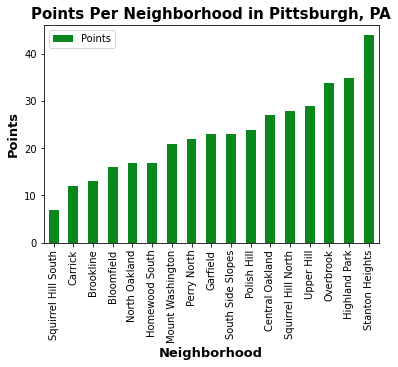

In [24]:
pointsDFSorted = pointsDF.sort_values("Points", ascending=True)

pointsDFSorted.plot.bar(color="#08871A",  x="Neighborhood", y="Points")
metaGraphGroup("Points")

## Conclusion

Once again, after sorting and graphig, we have our clear winners. Through our metrics of fire, crime, and speedhumps, we declare the safest neighborhood in Pittsburgh to be South Side Flats, followed by the runners up Squirrel Hill South and Carrick. Congratulations to all neighborhoods that put in their bid, you tried your best.